In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats

In [2]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

In [3]:
hybrid = Table.read_table(path_data + 'hybrid.csv')

In [4]:
hybrid

vehicle         | year | msrp    | acceleration | mpg   | class
Prius (1st Gen) | 1997 | 24509.7 | 7.46         | 41.26 | Compact
Tino            | 2000 | 35355   | 8.2          | 54.1  | Compact
Prius (2nd Gen) | 2000 | 26832.2 | 7.97         | 45.23 | Compact
Insight         | 2000 | 18936.4 | 9.52         | 53    | Two Seater
Civic (1st Gen) | 2001 | 25833.4 | 7.04         | 47.04 | Compact
Insight         | 2001 | 19036.7 | 9.52         | 53    | Two Seater
Insight         | 2002 | 19137   | 9.71         | 53    | Two Seater
Alphard         | 2003 | 38084.8 | 8.33         | 40.46 | Minivan
Insight         | 2003 | 19137   | 9.52         | 53    | Two Seater
Civic           | 2003 | 14071.9 | 8.62         | 41    | Compact
... (143 rows omitted)

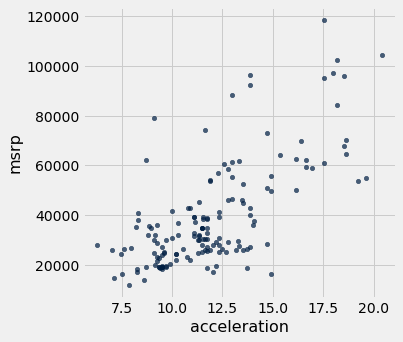

In [5]:
hybrid.scatter('acceleration', 'msrp')

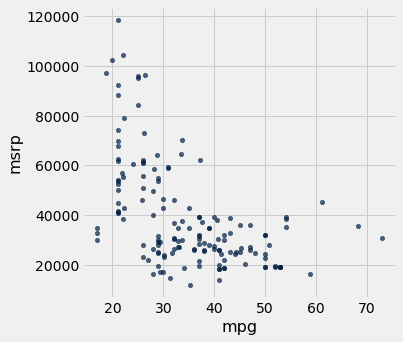

In [6]:
hybrid.scatter('mpg', 'msrp')

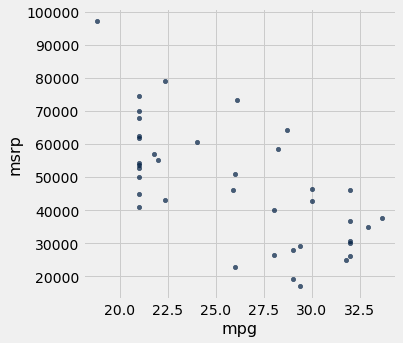

In [7]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

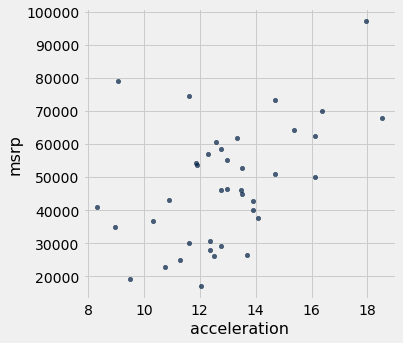

In [8]:
suv.scatter('acceleration', 'msrp')

In [9]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

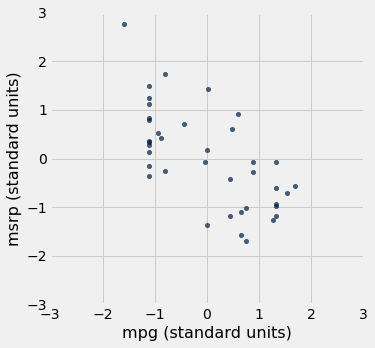

In [10]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

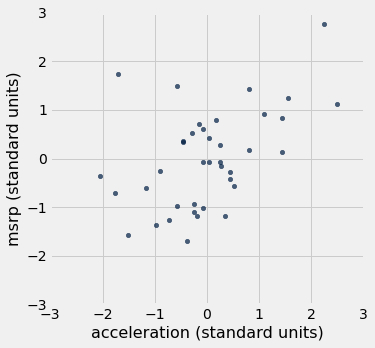

In [11]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

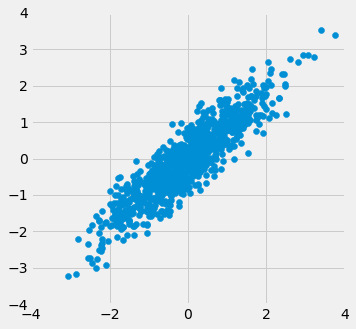

In [12]:
r_scatter(0.9)

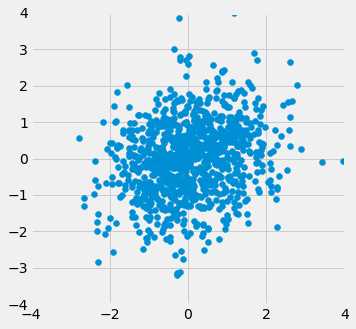

In [13]:
r_scatter(0.25)

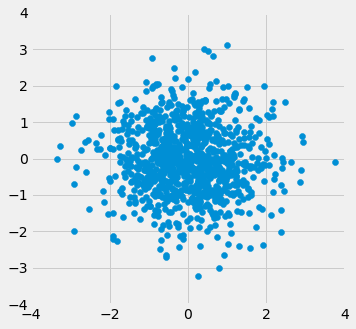

In [14]:
r_scatter(0)

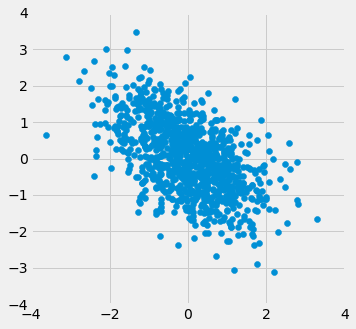

In [15]:
r_scatter(-0.55)

In [16]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x    | y
1    | 2
2    | 3
3    | 1
4    | 5
5    | 2
6    | 7

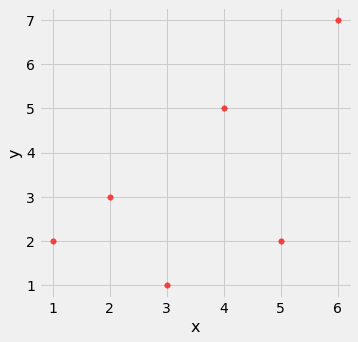

In [17]:
t.scatter(0, 1, s=30, color='red')

In [18]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x    | y    | x (standard units) | y (standard units)
1    | 2    | -1.46385           | -0.648886
2    | 3    | -0.87831           | -0.162221
3    | 1    | -0.29277           | -1.13555
4    | 5    | 0.29277            | 0.811107
5    | 2    | 0.87831            | -0.648886
6    | 7    | 1.46385            | 1.78444

In [19]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x    | y    | x (standard units) | y (standard units) | product of standard units
1    | 2    | -1.46385           | -0.648886          | 0.949871
2    | 3    | -0.87831           | -0.162221          | 0.142481
3    | 1    | -0.29277           | -1.13555           | 0.332455
4    | 5    | 0.29277            | 0.811107           | 0.237468
5    | 2    | 0.87831            | -0.648886          | -0.569923
6    | 7    | 1.46385            | 1.78444            | 2.61215

In [20]:
# r is the average of the products of standard units

r = np.mean(t_product.column(4))
r

0.6174163971897709

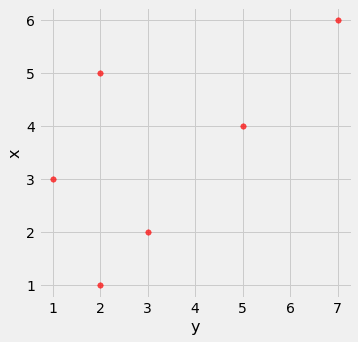

In [21]:
t.scatter('y', 'x', s=30, color='red')

In [22]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [23]:
correlation(t, 'x', 'y')

0.6174163971897709

In [24]:
correlation(t, 'y', 'x')

0.6174163971897709

In [25]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [26]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

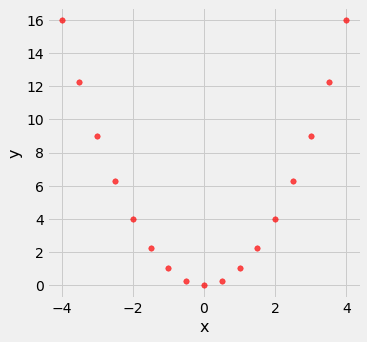

In [27]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [28]:
correlation(nonlinear, 'x', 'y')

0.0

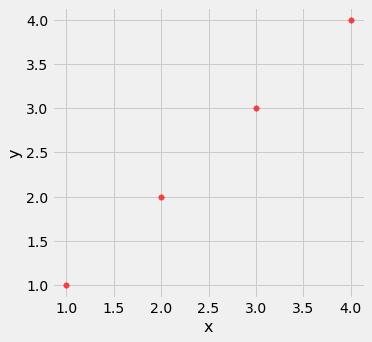

In [29]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [30]:
correlation(line, 'x', 'y')

1.0

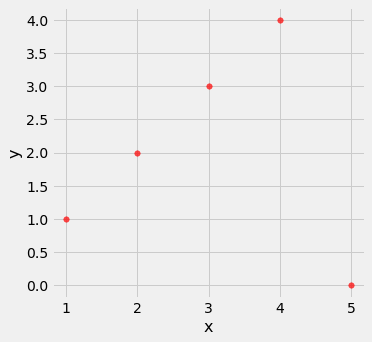

In [31]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [32]:
correlation(outlier, 'x', 'y')

0.0

In [33]:
sat2014 = Table.read_table(path_data + 'sat2014.csv').sort('State')
sat2014

State                | Participation Rate | Critical Reading | Math | Writing | Combined
Alabama              | 6.7                | 547              | 538  | 532     | 1617
Alaska               | 54.2               | 507              | 503  | 475     | 1485
Arizona              | 36.4               | 522              | 525  | 500     | 1547
Arkansas             | 4.2                | 573              | 571  | 554     | 1698
California           | 60.3               | 498              | 510  | 496     | 1504
Colorado             | 14.3               | 582              | 586  | 567     | 1735
Connecticut          | 88.4               | 507              | 510  | 508     | 1525
Delaware             | 100                | 456              | 459  | 444     | 1359
District of Columbia | 100                | 440              | 438  | 431     | 1309
Florida              | 72.2               | 491              | 485  | 472     | 1448
... (41 rows omitted)

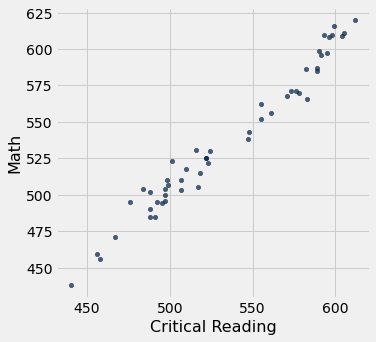

In [34]:
sat2014.scatter('Critical Reading', 'Math')

In [35]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434

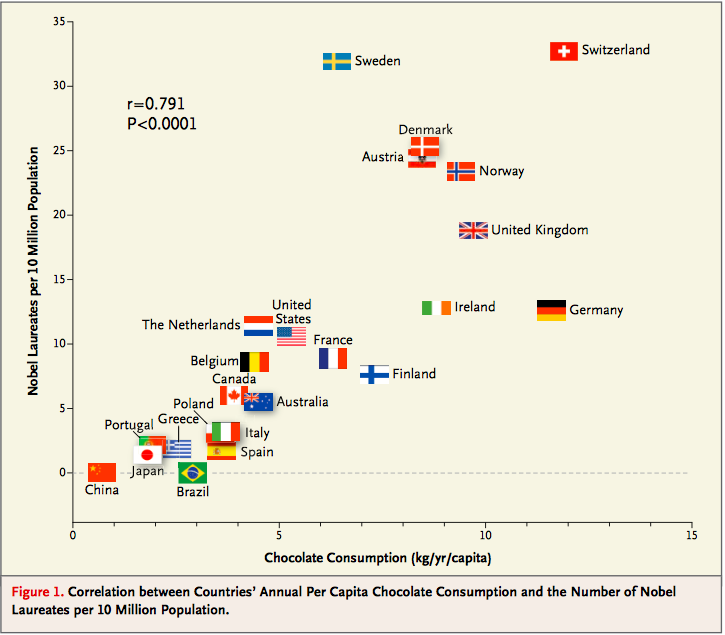

In [36]:
from IPython.display import Image
Image("../../../images/chocoNobel.png")